In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv('data_ml.csv', index_col=0)
data_raw.reset_index(inplace=True)
del data_raw['index']

In [3]:
idx_date = data_raw.index[(data_raw['date'] > '1999-12-31') & (data_raw['date'] < '2019-01-01')].to_list()

In [4]:
data_ml = data_raw.iloc[idx_date]

In [5]:
data_ml.iloc[0:6,0:6]

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover
0,13,2006-12-31,0.25,0.33,0.27,0.22
1,13,2007-01-31,0.25,0.32,0.28,0.22
2,13,2007-02-28,0.26,0.30,0.30,0.22
3,17,2015-03-31,0.73,0.64,0.70,0.40
4,17,2015-04-30,0.72,0.62,0.66,0.40
5,17,2015-05-31,0.71,0.63,0.64,0.40


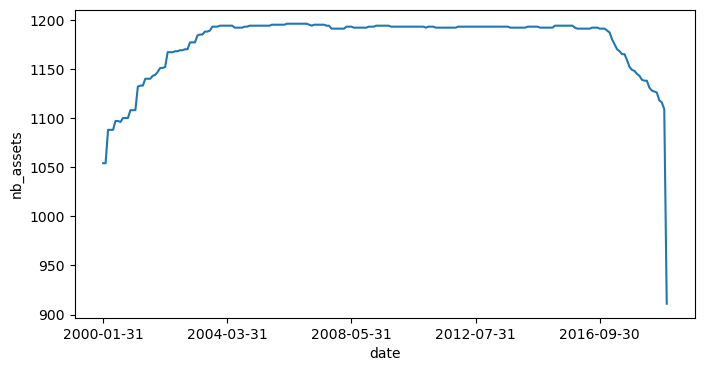

In [6]:
pd.Series(data_ml.groupby('date').size()).plot(figsize=(8, 4))
plt.ylabel('nb_assets')
plt.show()